In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

# 1. Read Raw Data

## 1.1. Artificial Data

In [4]:
url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
small_noise_url = url_root + small_noise_url_suffix
df_small_noise = pd.read_csv(small_noise_url)

daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
daily_jumpsup_url = url_root + daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(daily_jumpsup_url)

In [5]:
df_small_noise.head()

,timestamp,value
0,2014-04-01 00:00:00,18.324919
1,2014-04-01 00:05:00,21.970327
2,2014-04-01 00:10:00,18.624806
3,2014-04-01 00:15:00,21.953684
4,2014-04-01 00:20:00,21.909120


In [6]:
df_daily_jumpsup.head()

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739


## 1.2. Real Data

In [7]:
aws_url_suffix = "realKnownCause/ec2_request_latency_system_failure.csv"
aws_latency_data_url = url_root + aws_url_suffix
df_aws_latency = pd.read_csv(aws_latency_data_url)

In [8]:
df_aws_latency.head()

,timestamp,value
0,2014-03-07 03:41:00,45.868
1,2014-03-07 03:46:00,47.606
2,2014-03-07 03:51:00,42.580
3,2014-03-07 03:56:00,46.030
4,2014-03-07 04:01:00,44.992


In [9]:
# data from: https://github.com/numenta/NAB/blob/master/labels/combined_windows.json
anomalies = [
    [
        "2014-03-14 03:31:00.000000",
        "2014-03-14 14:41:00.000000"
    ],
    [
        "2014-03-18 17:06:00.000000",
        "2014-03-19 04:16:00.000000"
    ],
    [
        "2014-03-20 21:26:00.000000",
        "2014-03-21 03:41:00.000000"
    ]
]

# 2. Visualization

In [10]:
def plot_variance(df, agg_type='day'):
    df_copy = df.copy(deep=True)
    df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])
    df_copy['year'] = df_copy['timestamp'].apply(lambda x: x.year)
    df_copy['month'] = df_copy['timestamp'].apply(lambda x: x.month)
    df_copy['day'] = df_copy['timestamp'].apply(lambda x: x.day)
    df_copy['hour'] = df_copy['timestamp'].apply(lambda x: x.hour)
    df_copy['minute'] = df_copy['timestamp'].apply(lambda x: x.minute)
    
    stat = df_copy.groupby([agg_type]).agg({'value': ['var']})['value']
    stat.plot(kind='bar', figsize=(20,5))

## 2.1. Artificial Data

### 2.1.1. Without outliers

<AxesSubplot:>

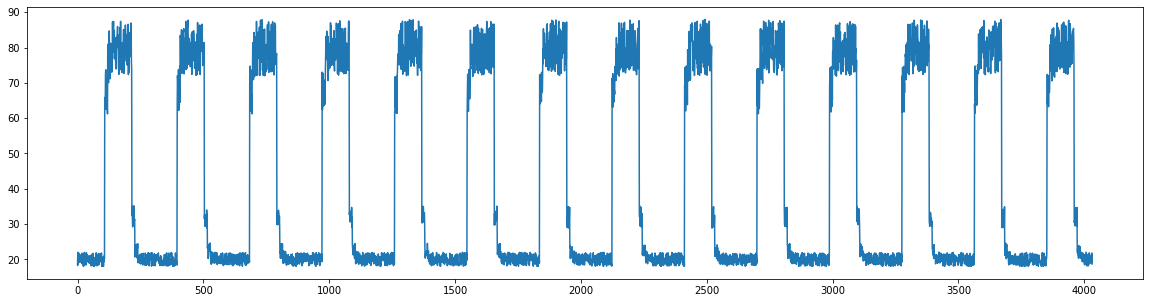

In [11]:
df_small_noise.value.plot(figsize=(20,5))

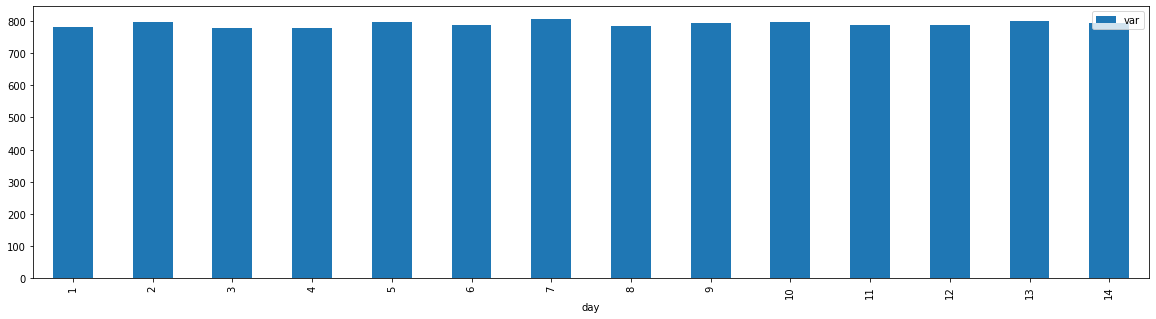

In [12]:
plot_variance(df_small_noise)

### 2.1.2. With Outliers

<AxesSubplot:>

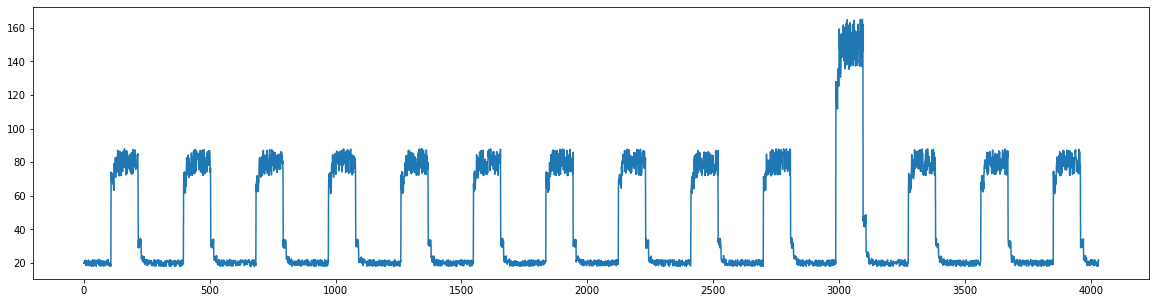

In [13]:
df_daily_jumpsup.value.plot(figsize=(20,5))

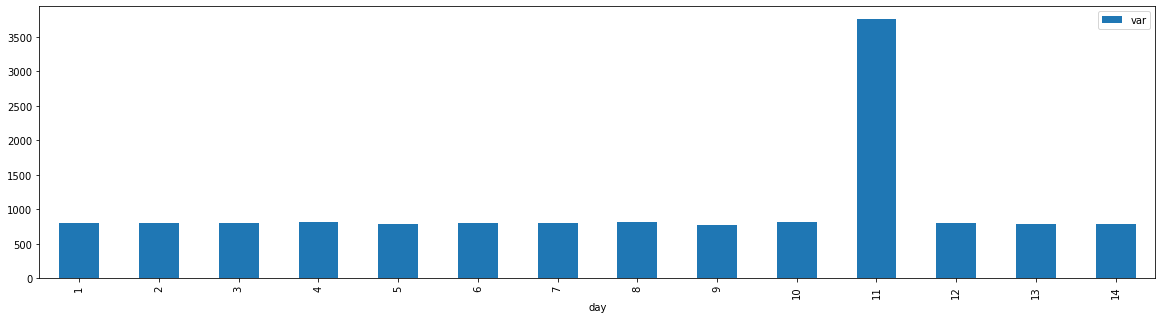

In [14]:
plot_variance(df_daily_jumpsup)

## 2.2. Real Data

### 2.2.1. Zoom-Out

<AxesSubplot:>

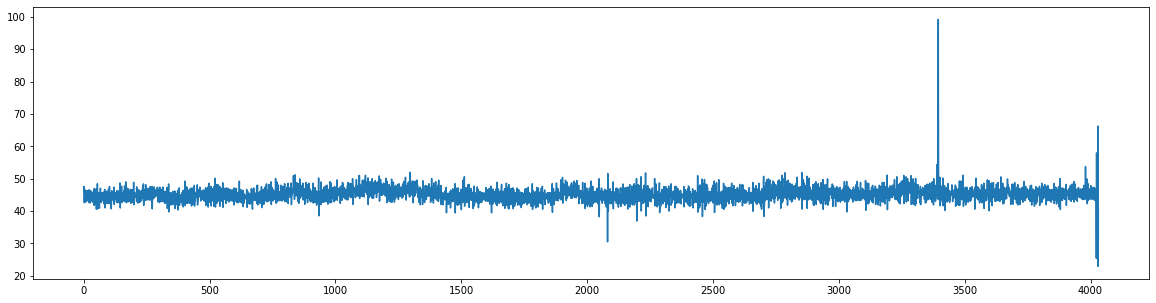

In [15]:
df_aws_latency.value.plot(figsize=(20,5))

### 2.2.2. Zoom-In

#### 1st interval with anomalies

<AxesSubplot:>

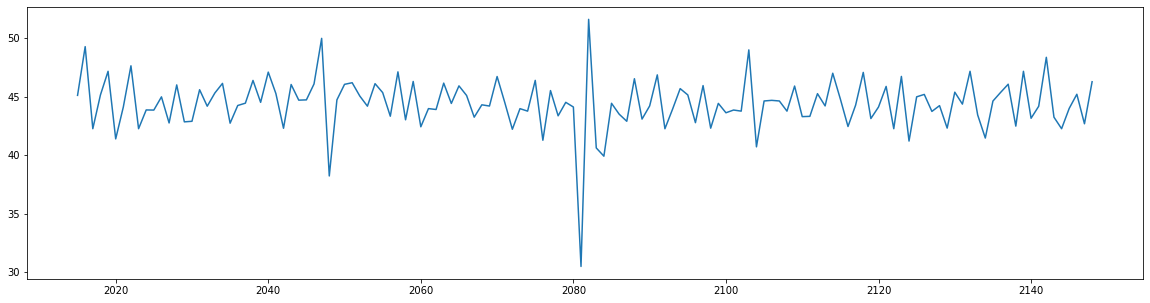

In [16]:
mask_anomaly1 = (df_aws_latency['timestamp'] > anomalies[0][0]) & (df_aws_latency['timestamp'] <= anomalies[0][1])
df_aws_latency.loc[mask_anomaly1].value.plot(figsize=(20,5))

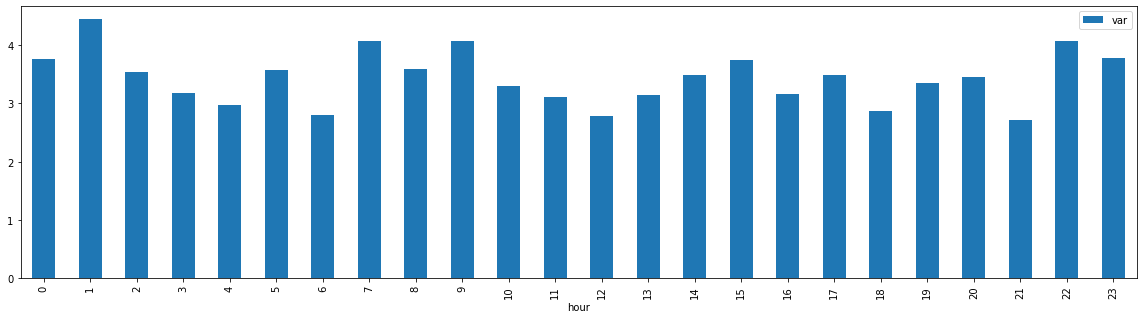

In [17]:
mask_before_anomaly1 = df_aws_latency['timestamp'] < anomalies[0][0]
plot_variance(df_aws_latency.loc[mask_before_anomaly1], agg_type='hour')

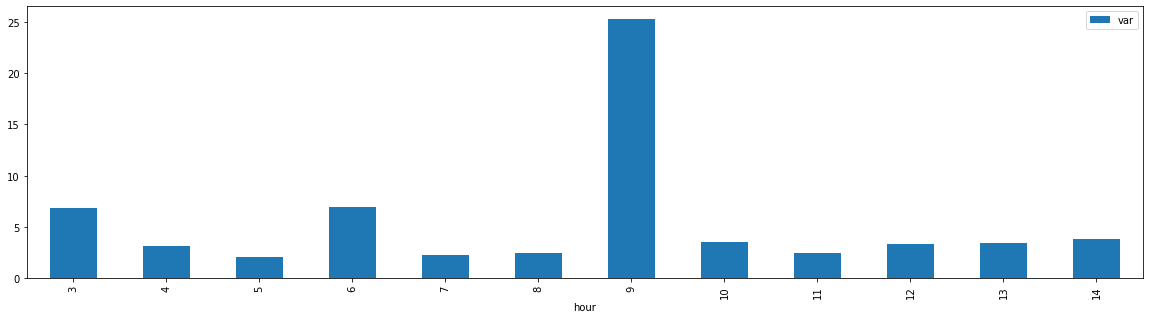

In [18]:
plot_variance(df_aws_latency.loc[mask_anomaly1], agg_type='hour')

#### 2nd interval with anomalies

<AxesSubplot:>

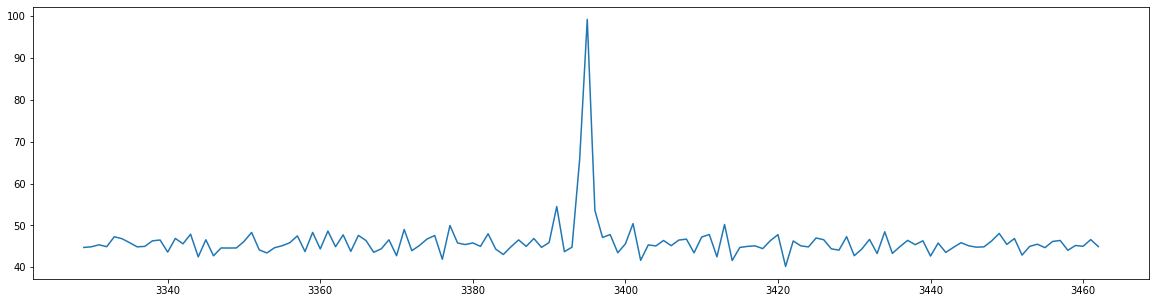

In [19]:
mask_anomaly2 = (df_aws_latency['timestamp'] > anomalies[1][0]) & (df_aws_latency['timestamp'] <= anomalies[1][1])
df_aws_latency.loc[mask_anomaly2].value.plot(figsize=(20,5))

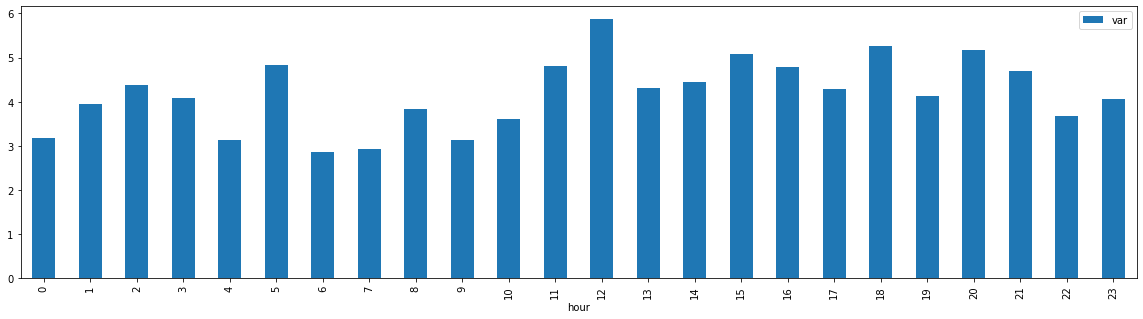

In [20]:
mask_between_anomaly1_and_2 = (df_aws_latency['timestamp'] > anomalies[0][1]) & (df_aws_latency['timestamp'] <= anomalies[1][0])
plot_variance(df_aws_latency.loc[mask_between_anomaly1_and_2], agg_type='hour')

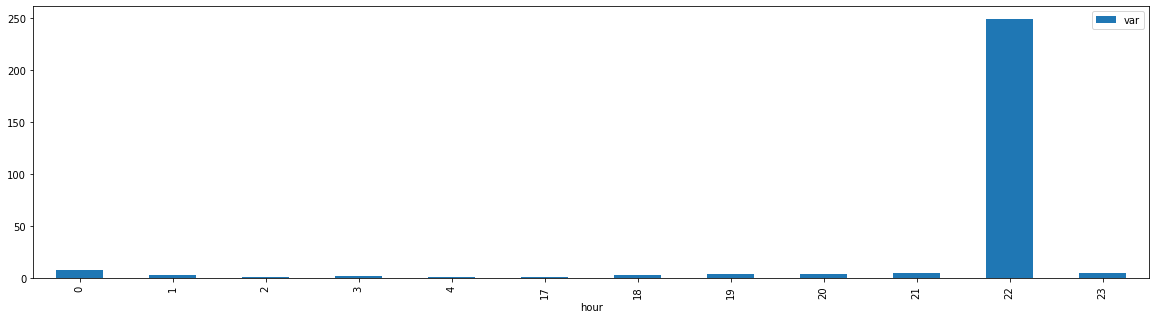

In [21]:
plot_variance(df_aws_latency.loc[mask_anomaly2], agg_type='hour')

#### 3rd interval with anomalies

In [22]:
mask_anomaly3 = (df_aws_latency['timestamp'] > anomalies[2][0]) & (df_aws_latency['timestamp'] <= anomalies[2][1])

<AxesSubplot:>

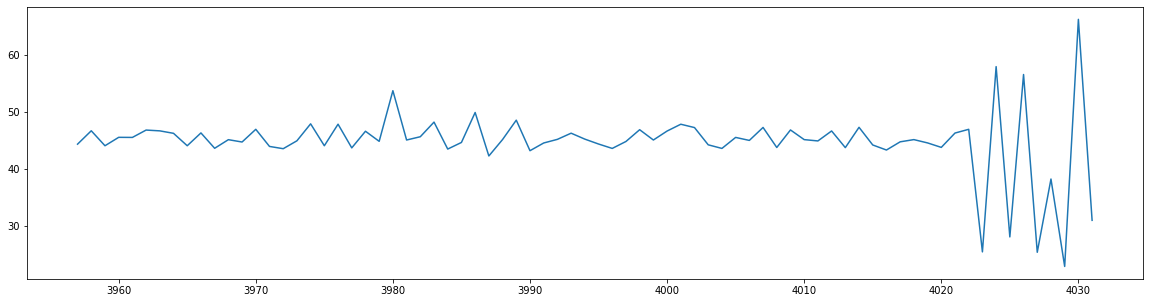

In [23]:
df_aws_latency.loc[mask_anomaly3].value.plot(figsize=(20,5))

In [24]:
mask_between_anomaly2_and_3 = (df_aws_latency['timestamp'] > anomalies[1][1]) & (df_aws_latency['timestamp'] <= anomalies[2][0])

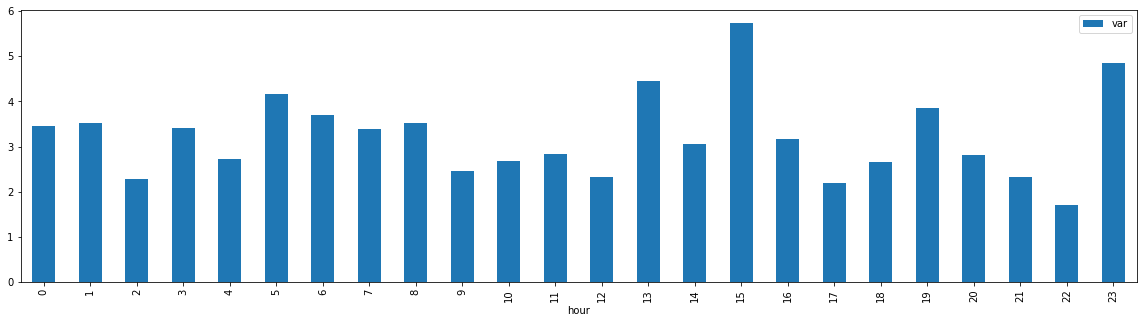

In [25]:
plot_variance(df_aws_latency.loc[mask_between_anomaly2_and_3], agg_type='hour')

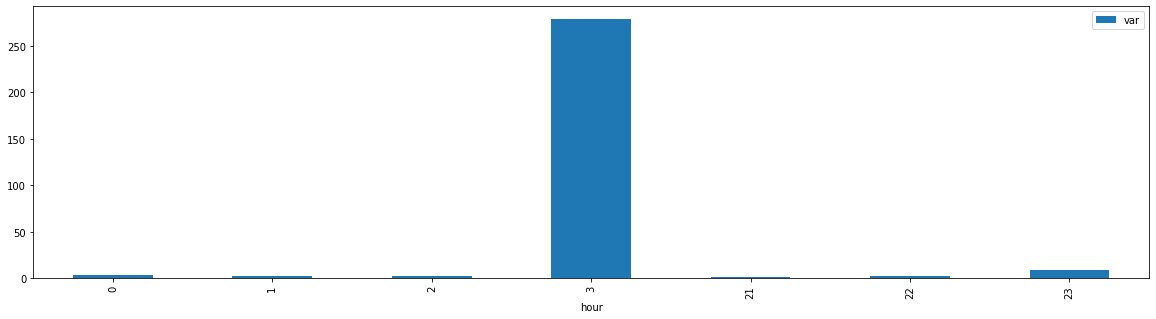

In [26]:
plot_variance(df_aws_latency.loc[mask_anomaly3], agg_type='hour')

# 3. Anomaly Types

## 3.1. Additive Outliers

In [28]:
df_aditive_outliers = df_small_noise.head(1000).copy()
additive_anomaly = (df_additive_outliers['value'] == df_aditive_outliers.value.at[850])
df_aditive_outliers.value.at[850] = df_aditive_outliers.value.at[850] + 100

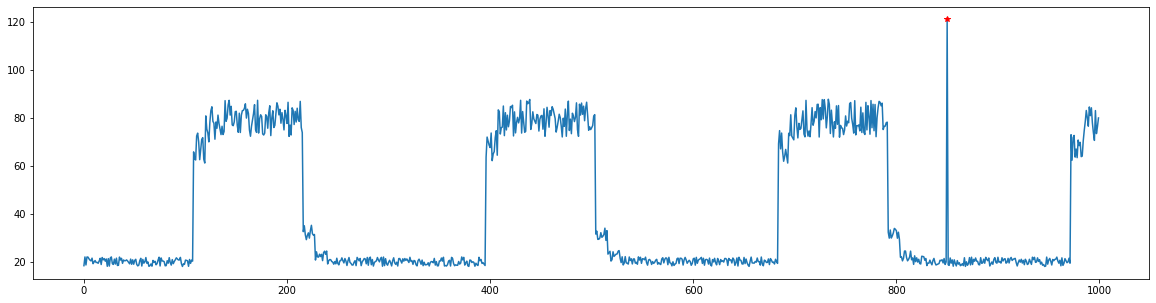

In [29]:
fig, ax = plt.subplots()
ax = df_aditive_outliers.value.plot(figsize=(20,5))
ax = df_aditive_outliers.loc[additive_anomaly].value.plot(figsize=(20,5), color='red', style='*')

## 3.2. Level-shift Outliers

In [30]:
df_level_shift_outliers = df_small_noise.head(1000).copy()
level_shift_anomaly = (df_level_shift_outliers.index > 600)
cols = ['value']
df_level_shift_outliers.loc[level_shift_anomaly, cols] = df_level_shift_outliers[cols] *3

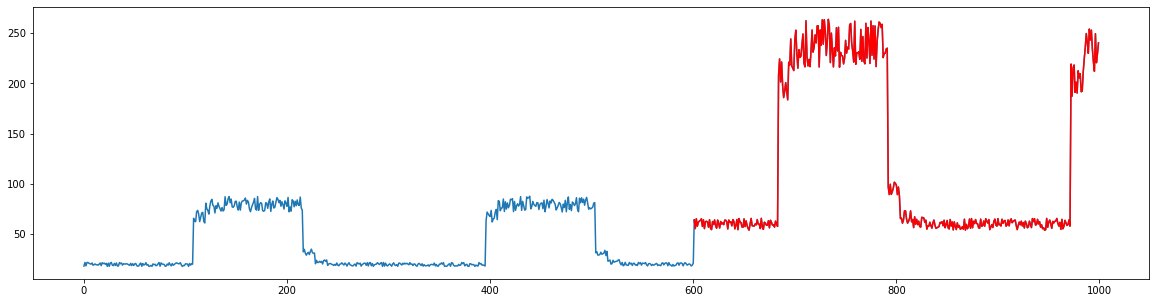

In [31]:
fig, ax = plt.subplots()
ax = df_level_shift_outliers.value.plot(figsize=(20,5))
ax = df_level_shift_outliers.loc[level_shift_anomaly].value.plot(figsize=(20,5), color='red')
plt.show()

## 3.3. Transient Change Outliers

In [34]:
df_level_transient_change_outliers = df_small_noise.head(1000).copy()
transient_change_anomaly = (df_level_transient_change_outliers.index >= 600) & (df_level_transient_change_outliers.index < 650)
cols = ['value']

def exp_reduce(values):
    res = []
    for idx, v in enumerate(values):
        if idx >= 600:
            i = idx - 600
            rv = v + v * abs(1-np.exp(1/(i+1)))
            res.append(rv)
        else:
            res.append(v)
    return res

df_level_transient_change_outliers.loc[transient_change_anomaly, cols] = df_level_transient_change_outliers[cols].apply(exp_reduce)

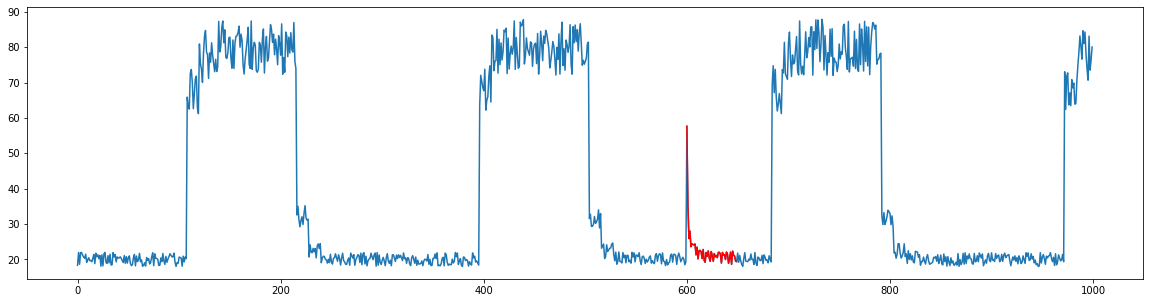

In [35]:
fig, ax = plt.subplots()
ax = df_level_transient_change_outliers.value.plot(figsize=(20,5))
ax = df_level_transient_change_outliers.loc[transient_change_anomaly].value.plot(figsize=(20,5), color='red')
plt.show()

## 3.4. Local Trend Outlier

In [38]:
df_level_local_trend_outliers = df_small_noise.head(1000).copy()
local_trend_anomaly = (df_level_local_trend_outliers.index >= 600) & (df_level_local_trend_outliers.index < 650)
cols = ['value']

def exp_reduce(values):
    res = []
    for idx, v in enumerate(values):
        if idx >= 600:
            i = idx - 600
            rv = v + 40 + idx - 600
            res.append(rv)
        else:
            res.append(v)
    return res

df_level_local_trend_outliers.loc[local_trend_anomaly, cols] = df_level_local_trend_outliers[cols].apply(exp_reduce)

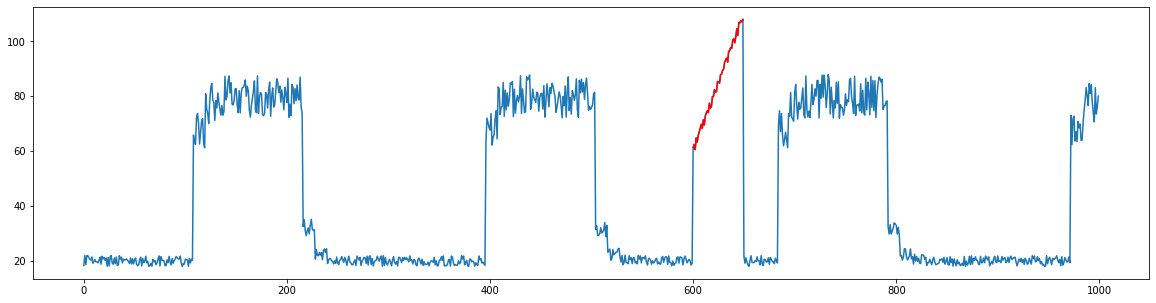

In [39]:
fig, ax = plt.subplots()
ax = df_level_local_trend_outliers.value.plot(figsize=(20,5))
ax = df_level_local_trend_outliers.loc[local_trend_anomaly].value.plot(figsize=(20,5), color='red')
plt.show()

## 3.5. Seasonal Additive Outlier

In [40]:
df_seasonal_aditive_outliers = df_small_noise.head(1000).copy()
vals = [df_seasonal_aditive_outliers.value.at[150], df_seasonal_aditive_outliers.value.at[450]]
seasonal_additive_anomaly = (df_seasonal_aditive_outliers['value'] == df_seasonal_aditive_outliers.value.at[150]) | \
                            (df_seasonal_aditive_outliers['value'] == df_seasonal_aditive_outliers.value.at[450]) | \
                            (df_seasonal_aditive_outliers['value'] == df_seasonal_aditive_outliers.value.at[750])
df_seasonal_aditive_outliers.value.at[150] = df_seasonal_aditive_outliers.value.at[150] + 100
df_seasonal_aditive_outliers.value.at[450] = df_seasonal_aditive_outliers.value.at[450] + 100
df_seasonal_aditive_outliers.value.at[750] = df_seasonal_aditive_outliers.value.at[750] + 100

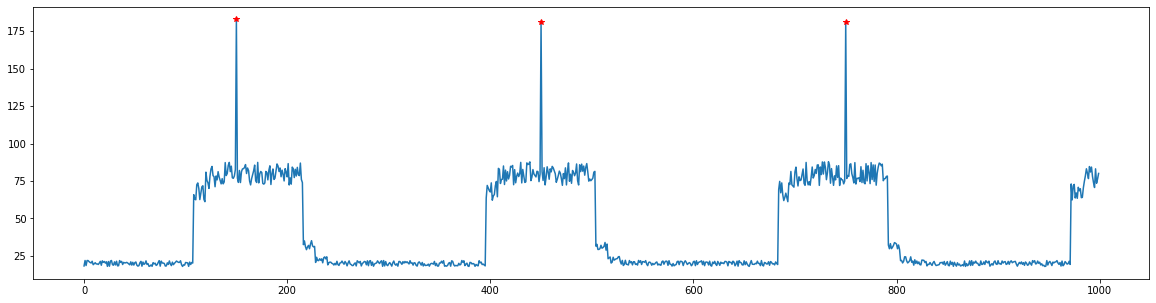

In [41]:
fig, ax = plt.subplots()
ax = df_seasonal_aditive_outliers.value.plot(figsize=(20,5))
ax = df_seasonal_aditive_outliers.loc[seasonal_additive_anomaly].value.plot(figsize=(20,5), color='red', style='*')
plt.show()

## 3.5. Real Machinery Anomalies

### 3.5.1. Load Data

In [42]:
data_machinery_url_suffix = "realKnownCause/machine_temperature_system_failure.csv"
data_machinery_url = url_root + data_machinery_url_suffix
df_machinery = pd.read_csv(data_machinery_url)

In [43]:
df_machinery.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


<AxesSubplot:>

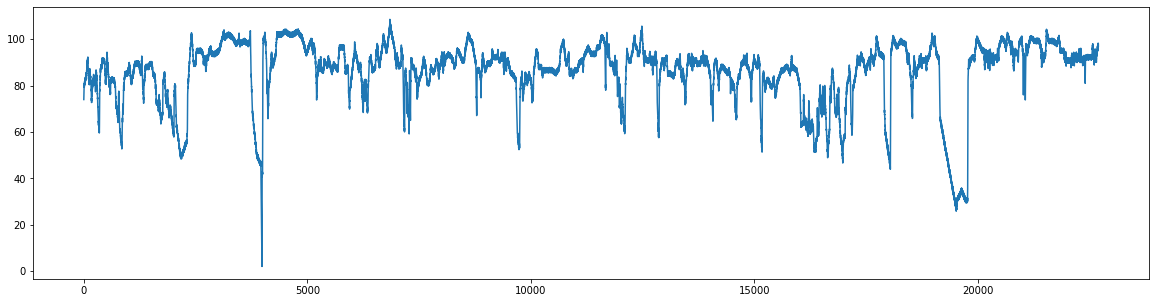

In [44]:
df_machinery.value.plot(figsize=(20,5))

### 3.5.1. Anomalies

In [45]:
anomalies_machinery = [
    [
        "2013-12-10 06:25:00.000000",
        "2013-12-12 05:35:00.000000"
    ],
    [
        "2013-12-15 17:50:00.000000",
        "2013-12-17 17:00:00.000000"
    ],
    [
        "2014-01-27 14:20:00.000000",
        "2014-01-29 13:30:00.000000"
    ],
    [
        "2014-02-07 14:55:00.000000",
        "2014-02-09 14:05:00.000000"
    ]
]

In [47]:
mask_machinery_anomaly1 = (df_machinery['timestamp'] > anomalies_machinery[0][0]) & (df_machinery['timestamp'] <= anomalies_machinery[0][1])
mask_machinery_anomaly2 = (df_machinery['timestamp'] > anomalies_machinery[1][0]) & (df_machinery['timestamp'] <= anomalies_machinery[1][1])
mask_machinery_anomaly3 = (df_machinery['timestamp'] > anomalies_machinery[2][0]) & (df_machinery['timestamp'] <= anomalies_machinery[2][1])
mask_machinery_anomaly4 = (df_machinery['timestamp'] > anomalies_machinery[3][0]) & (df_machinery['timestamp'] <= anomalies_machinery[3][1])

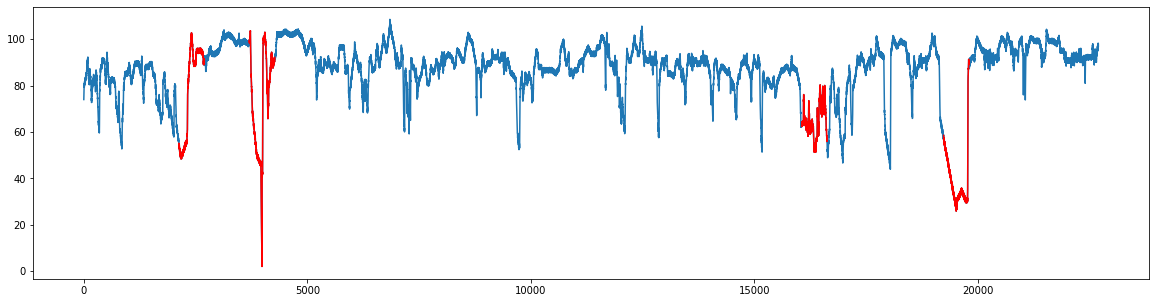

In [48]:
fig, ax = plt.subplots()

ax = df_machinery.value.plot(figsize=(20,5))
ax = df_machinery.loc[mask_machinery_anomaly1].value.plot(figsize=(20,5), color='red')
ax = df_machinery.loc[mask_machinery_anomaly2].value.plot(figsize=(20,5), color='red')
ax = df_machinery.loc[mask_machinery_anomaly3].value.plot(figsize=(20,5), color='red')
ax = df_machinery.loc[mask_machinery_anomaly4].value.plot(figsize=(20,5), color='red')

plt.show()

### 3.5.3. Detect Anomalies Using Variance

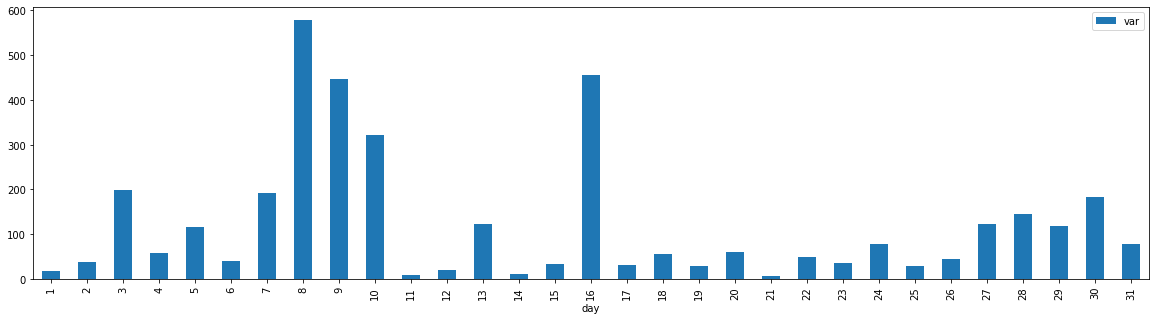

In [49]:
plot_variance(df_machinery, agg_type='day')

In [50]:
mask_machinery_before_anomaly1 = df_machinery['timestamp'] < anomalies_machinery[0][0]
mask_machinery_before_and_during_anomaly1 = df_machinery['timestamp'] <= anomalies_machinery[0][1]

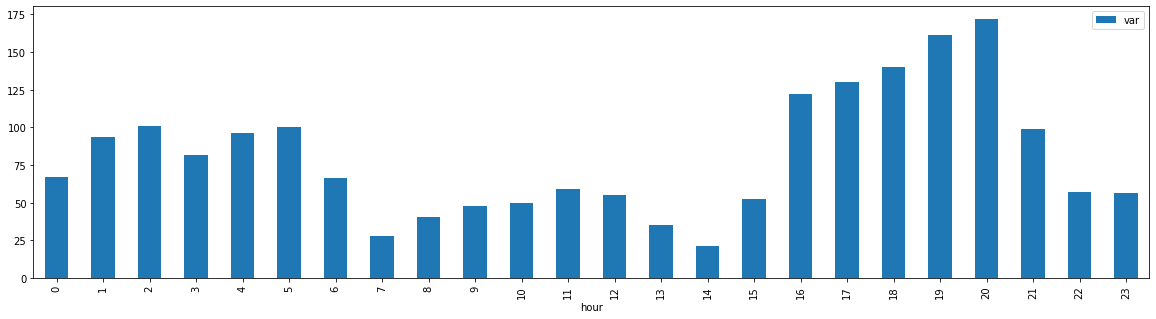

In [51]:
plot_variance(df_machinery.loc[mask_machinery_before_anomaly1], agg_type='hour')

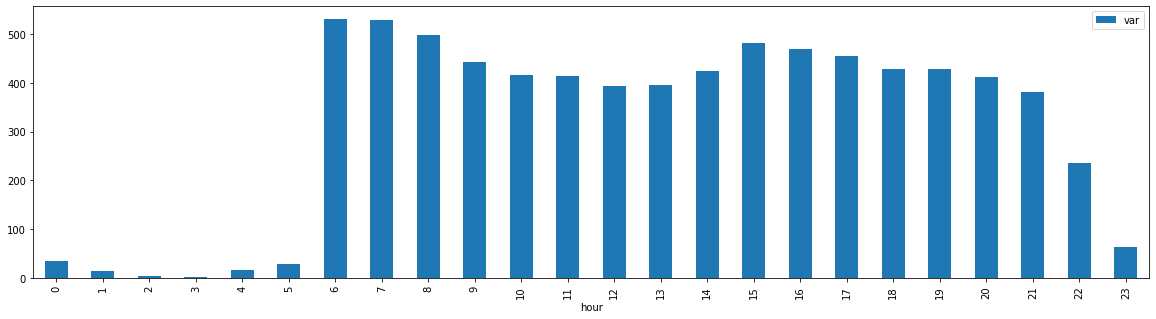

In [52]:
plot_variance(df_machinery.loc[mask_machinery_anomaly1], agg_type='hour')

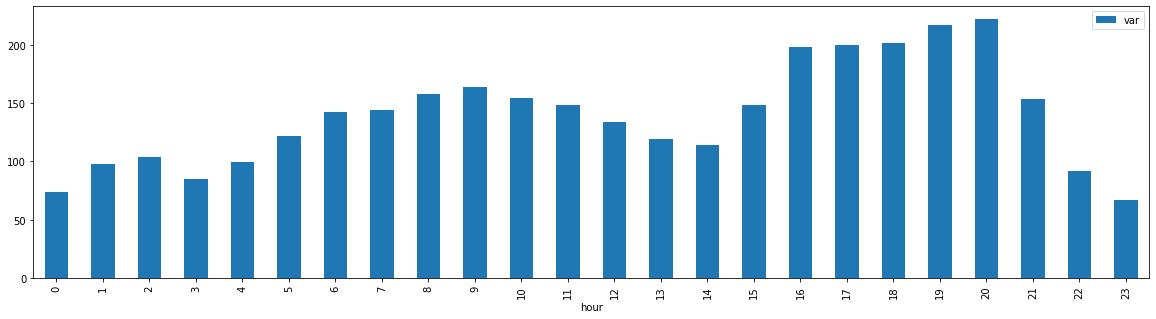

In [53]:
plot_variance(df_machinery.loc[mask_machinery_before_and_during_anomaly1], agg_type='hour')